## Implement frequency domain filters on an image

In [1]:
%autocall 1

Automatic calling is: Smart


In [2]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2

In [3]:
train = pd.read_csv('images/mnist_train.csv')

print(train.shape[0])
print(type(train.shape[0]))

60000
<class 'int'>


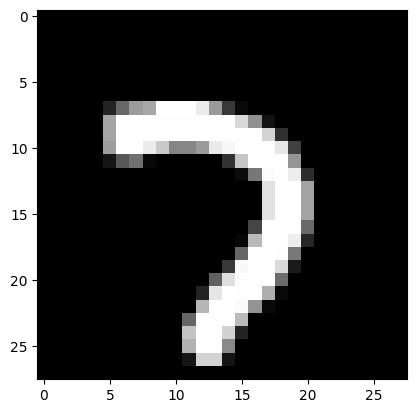

In [4]:
row_num = np.random.randint(60000)

pixels = train.iloc[row_num][1:].values.reshape(28, 28)
image = np.array(pixels, dtype=np.uint8)
image = Image.fromarray(image)

plt.imshow(image, cmap='gray')
plt.show()

In [5]:
image = Image.open('images/lena_std.tif').convert('L')
image = np.array(image)

In [6]:
# def center_image(image):
#     image = np.array(image)
#     rows, cols = image.shape
#     center_row, center_col = rows // 2, cols // 2
#     centered_image = np.zeros_like(image, dtype=np.uint8)

#     for i in range(rows):
#         for j in range(cols):
#             centered_image[i, j] = image[(i + center_row) % rows, (j + center_col) % cols]

#     return centered_image

def center_image(image):
    rows, cols = image.shape
    mask = np.zeros((rows, cols), dtype=np.uint8)
    mask[::2, ::2] = 1
    mask[1::2, 1::2] = 1
    return image * mask + (255 - image) * (1 - mask)

In [7]:
def low_pass_filter(f, threshold_freq):
    rows, cols = f.shape
    center_row, center_col = rows // 2, cols // 2
    for u in range(rows):
        for v in range(cols):
            if ((u - center_row)**2 + (v - center_col)**2) > threshold_freq**2:
                f[u, v] = 0
    return f

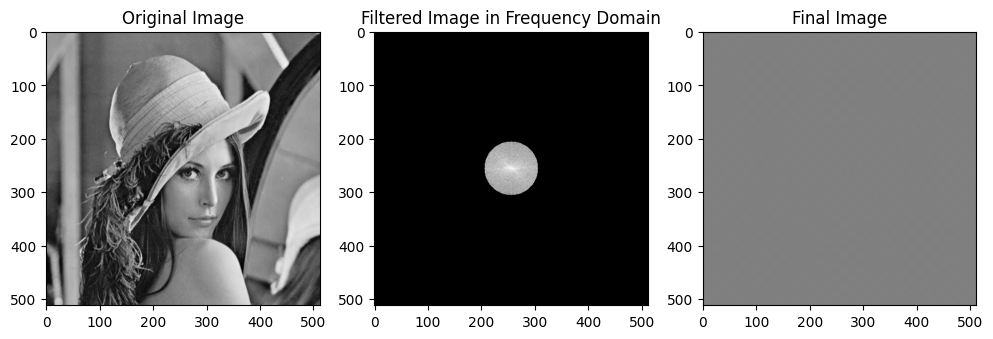

In [8]:
# Step 1: Center the image without using fftshift
centered_image = center_image(image)

# Step 2: Apply DFT
dft_image = fft2(centered_image)

# Step 3: Apply low pass filter
cutoff_frequency = 50  # You can adjust this value
filtered_image = low_pass_filter(dft_image, cutoff_frequency)

# Step 4: Apply IDFT
idft_image = ifft2(filtered_image)
idft_image = np.abs(idft_image)

# Step 5: Again apply center shift
final_image = center_image(idft_image)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Filtered Image in Frequency Domain')
plt.imshow(np.log(1 + np.abs(filtered_image)), cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Final Image')
plt.imshow(final_image, cmap='gray')

plt.show()